# Assignment 11 #

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tiingo import TiingoClient
import numpy as np
from datetime import date
import warnings
import datetime as dt
import pandas_datareader as pdr
warnings.filterwarnings('ignore')
from dateutil.relativedelta import relativedelta
config = {}

config['session'] = True

config['api_key'] = "110ee73e29ec4269f49eb85cfb4b976ab8e73361"

client = TiingoClient(config)

In [3]:
tickers = ['GE','IBM','WFC','^GSPC']
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022, 1, 1)

df = pdr.get_data_yahoo(tickers, start, end, interval="d")
df.head()

Attributes  Adj Close                                          Close  \
Symbols            GE         IBM        WFC        ^GSPC         GE   
Date                                                                   
2021-01-04  83.421608  110.134735  29.011137  3700.649902  83.760002   
2021-01-05  85.811905  112.089676  29.821886  3726.860107  86.160004   
2021-01-06  90.512833  114.888817  31.931784  3748.139893  90.879997   
2021-01-07  89.795753  114.622231  32.654625  3803.790039  90.160004   
2021-01-08  90.353485  114.213478  32.420189  3824.679932  90.720001   

Attributes                                           High              ...  \
Symbols            IBM        WFC        ^GSPC         GE         IBM  ...   
Date                                                                   ...   
2021-01-04  118.489487  29.700001  3700.649902  87.199997  120.382408  ...   
2021-01-05  120.592735  30.530001  3726.860107  87.040001  121.108986  ...   
2021-01-06  123.604210  32.689999  3748.139893  92.959999  126.080307  ...   
2021-01-07  123.317398  33.430000  3803.790039  92.559998  124.722755  ...   
2021-01-08  122.877632  33.189999  3824.679932  91.519997  123.632889  ...   

Attributes        Low                    Open                         \
Symbols           WFC        ^GSPC         GE         IBM        WFC   
Date                                                                   
2021-01-04  29.400000  3662.709961  87.120003  120.315491  30.320000   
2021-01-05  29.820000  3695.070068  83.440002  119.512428  30.090000   
2021-01-06  31.790001  3705.340088  86.639999  121.319313  31.900000   
2021-01-07  33.320000  3764.709961  92.480003  124.321220  33.580002   
2021-01-08  32.669998  3783.600098  90.320000  122.915871  33.610001   

Attributes                   Volume                                       
Symbols           ^GSPC          GE        IBM         WFC         ^GSPC  
Date                                                                      
2021-01-04  3764.610107   9993688.0  5417443.0  31421600.0  5.006680e+09  
2021-01-05  3698.020020  10462538.0  6395872.0  37360000.0  4.582620e+09  
2021-01-06  3712.199951  16448075.0  8322708.0  73507500.0  6.049970e+09  
2021-01-07  3764.709961   9411225.0  4714740.0  50634100.0  5.080870e+09  
2021-01-08  3815.050049   9089963.0  4891305.0  32324700.0  4.764180e+09  

[5 rows x 24 columns]

In [4]:
price_df = df['Adj Close']
price_df.head()

Symbols            GE         IBM        WFC        ^GSPC
Date                                                     
2021-01-04  83.421608  110.134735  29.011137  3700.649902
2021-01-05  85.811905  112.089676  29.821886  3726.860107
2021-01-06  90.512833  114.888817  31.931784  3748.139893
2021-01-07  89.795753  114.622231  32.654625  3803.790039
2021-01-08  90.353485  114.213478  32.420189  3824.679932

In [6]:
sma_20 = price_df.rolling(window=20).mean()
sma_5 = price_df.rolling(window=5).mean()
sma_5.head(10)

Symbols            GE         IBM        WFC        ^GSPC
Date                                                     
2021-01-04        NaN         NaN        NaN          NaN
2021-01-05        NaN         NaN        NaN          NaN
2021-01-06        NaN         NaN        NaN          NaN
2021-01-07        NaN         NaN        NaN          NaN
2021-01-08  87.979117  113.189787  31.167924  3760.823975
2021-01-11  89.540781  114.014420  31.859502  3780.616016
2021-01-12  91.150252  114.560030  32.525684  3795.481982
2021-01-13  91.484895  114.138826  32.742536  3807.822021
2021-01-14  92.106371  114.135271  33.000412  3806.172021
2021-01-15  92.090434  114.110388  32.775747  3794.886035

In [32]:
def calculate_ema(prices, days, smoothing=2):
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    for i in range(days-1):
        ema.insert(0,None)
    return ema

In [33]:
ge_ema = calculate_ema(price_df['GE'],10)
ibm_ema = calculate_ema(price_df['IBM'],10)
wfc_ema = calculate_ema(price_df['WFC'],10)


In [14]:
price_df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

Text(0.5, 0.98, 'Simple Moving Average')

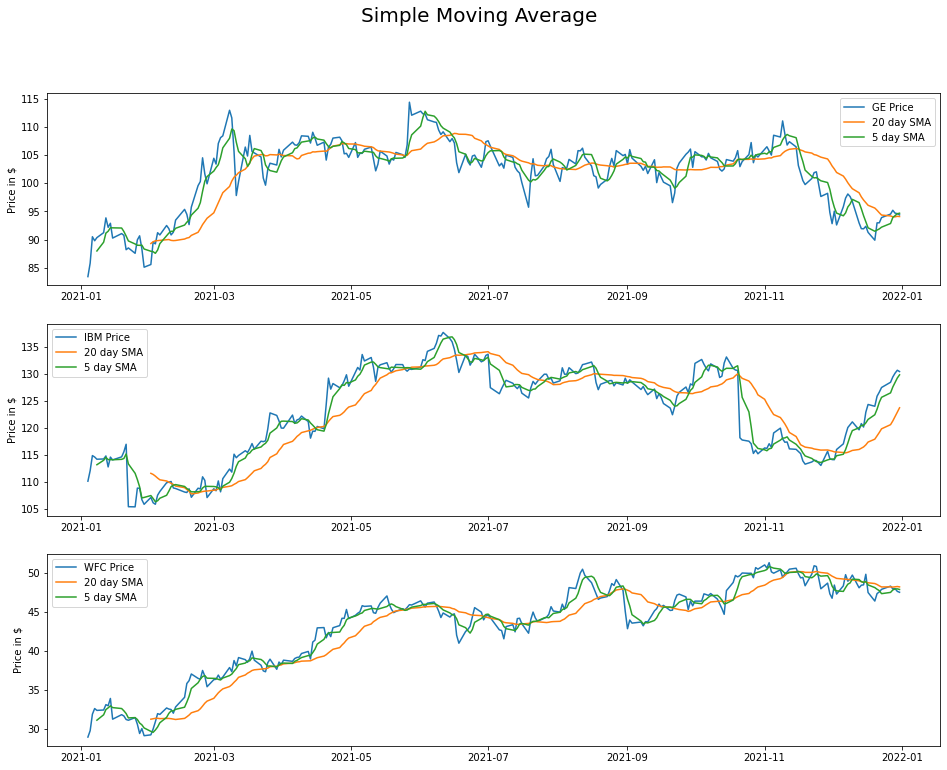

In [37]:
fig, axs = plt.subplots(3,figsize=(16,12))
axs[0].plot(price_df.index,price_df['GE'],label='GE Price')
axs[0].plot(sma_20.index,sma_20['GE'],label='20 day SMA')
axs[0].plot(sma_5.index,sma_5['GE'],label='5 day SMA')
axs[0].legend(loc='best')
axs[0].set_ylabel('Price in $')

axs[1].plot(price_df.index,price_df['IBM'],label='IBM Price')
axs[1].plot(sma_20.index,sma_20['IBM'],label='20 day SMA')
axs[1].plot(sma_5.index,sma_5['IBM'],label='5 day SMA')
axs[1].legend(loc='best')
axs[1].set_ylabel('Price in $')

axs[2].plot(price_df.index,price_df['WFC'],label='WFC Price')
axs[2].plot(sma_20.index,sma_20['WFC'],label='20 day SMA')
axs[2].plot(sma_5.index,sma_5['WFC'],label='5 day SMA')
axs[2].legend(loc='best')
axs[2].set_ylabel('Price in $')

fig.suptitle('Simple Moving Average',fontsize=20)


Text(0.5, 0.98, 'Exponential Moving Average')

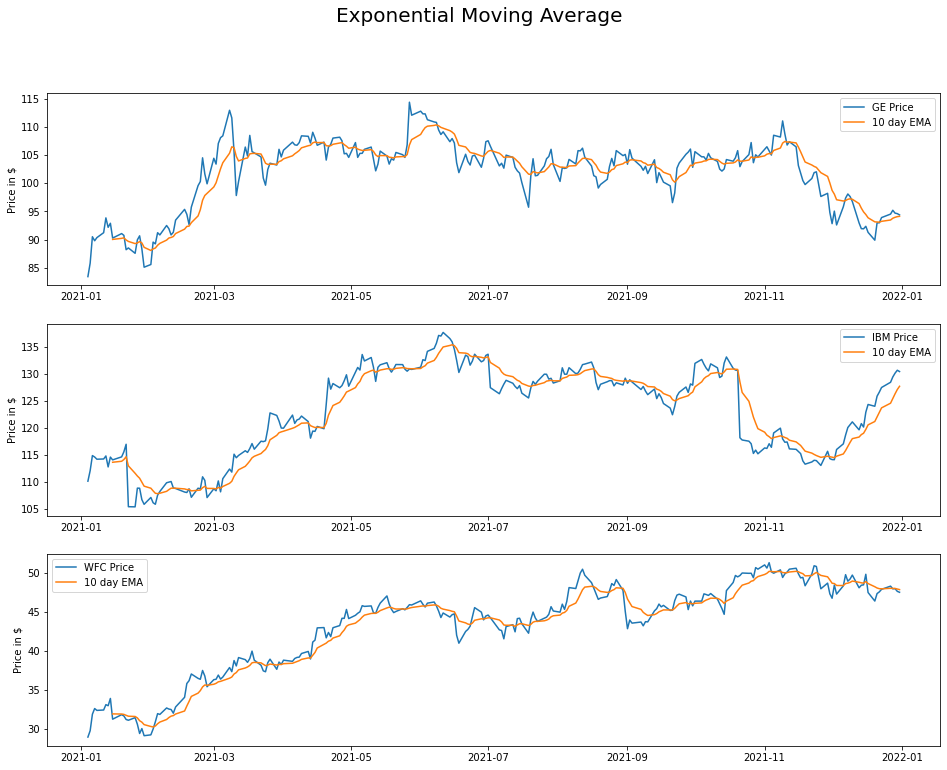

In [39]:
fig, axs = plt.subplots(3,figsize=(16,12))
axs[0].plot(price_df.index,price_df['GE'],label='GE Price')
axs[0].plot(price_df.index,ge_ema,label='10 day EMA')
axs[0].legend(loc='best')
axs[0].set_ylabel('Price in $')

axs[1].plot(price_df.index,price_df['IBM'],label='IBM Price')
axs[1].plot(price_df.index,ibm_ema,label='10 day EMA')
axs[1].legend(loc='best')
axs[1].set_ylabel('Price in $')

axs[2].plot(price_df.index,price_df['WFC'],label='WFC Price')
axs[2].plot(price_df.index,wfc_ema,label='10 day EMA')
axs[2].legend(loc='best')
axs[2].set_ylabel('Price in $')

fig.suptitle('Exponential Moving Average',fontsize=20)